# Logistic_Regression_with_tf-idf_Vectorization_and_Preprocessing
______

##### Importing Libraries

In [1]:
import os
import glob
import numpy as np
from warnings import simplefilter
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
from nltk.stem import WordNetLemmatizer 
import random

simplefilter(action='ignore', category=FutureWarning)

##### Importing Dataset

In [2]:
train_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/pos/'
train_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/neg/'
test_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/pos/'
test_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/neg/'

##### Reading Data from Function

In [3]:
def read_files_in_path(path):
    positive_training_data=[]
    for filepath in glob.glob(os.path.join(path, '*.txt')):
        with open(filepath,encoding='utf8') as f:
            content = f.read()
            positive_training_data.append(content)
    return positive_training_data

##### Reading training data

In [4]:
positive_training_data = read_files_in_path(train_positive_path)
negative_training_data = read_files_in_path(train_negative_path)
whole_training_data = positive_training_data+negative_training_data

##### Reading Test Data

In [5]:
positive_test_data = read_files_in_path(test_positive_path)
negative_test_data = read_files_in_path(test_negative_path)
whole_test_data = positive_test_data+negative_test_data

##### Remove HTML tags from dataset

In [6]:
def cleanhtml(whole_training_data):
    no_HTML_whole_training_data = []
    cleaner = re.compile('<.*?>')
    for review in whole_training_data:
        cleantext = re.sub(cleaner, '', review)
        no_HTML_whole_training_data.append(cleantext)
    return no_HTML_whole_training_data

##### Remove stop words and punctuation

In [7]:
def remove_punc_stop_words(no_HTML_whole_training_data):
    clean_training_data = []
    for review in no_HTML_whole_training_data:
        #remove punctuation marks
        review = review.lower()
        for ch in string.punctuation:
            review = review.replace(ch,' ')
        #Remove stop words
        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(review) 
        filtered_words = [w for w in word_tokens if not w in stop_words] 
        #construct the review again
        sentence =''
        for word in filtered_words:
            sentence+=lemmatize_word(word)
            sentence+=' '
        clean_training_data.append(sentence)
    return clean_training_data

##### Lemmatizing words

In [8]:
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

##### Clean data from HTML tags

In [9]:
no_HTML_whole_training_data = cleanhtml(whole_training_data)

In [10]:
print(whole_training_data[210])

The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.<br /><br />Stargate SG1 is currently one of my favorite programs.


In [11]:
print(no_HTML_whole_training_data[210])

The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.Stargate SG1 is currently one of my favorite programs.


In [12]:
clean_training_data = remove_punc_stop_words(no_HTML_whole_training_data)

In [13]:
print(set(stopwords.words('english')))

{'on', 'other', 'with', "wouldn't", 'those', 'of', "shouldn't", "hadn't", 'do', 'whom', 'am', 'ourselves', 'too', 'about', 'again', 'no', 'is', 'so', 'i', 'we', 'you', 'for', 'how', 'doing', 'until', 'hadn', 'against', 'these', 'does', 'yourselves', 'during', 'will', 'our', 'an', 'but', 'wasn', 'should', "shan't", 'weren', 'been', 'by', 'which', 'further', "aren't", 'don', 'to', 'he', 'they', 'theirs', 'now', 'mightn', 'are', 'in', 'if', 'over', 'herself', "should've", 'isn', 'aren', 'as', 'won', "won't", 'ours', 'just', 'then', 'who', 'before', "you've", 'both', 'after', 'under', 'out', 'can', 'it', 'its', 'be', 'mustn', 'only', 'any', 'or', 'shan', 'doesn', 'not', "you'll", 'why', 'o', 'through', 'that', 'where', 'll', 'him', "couldn't", 'more', "don't", 'her', "haven't", 'haven', 'itself', 'at', 'wouldn', 'once', 'and', "it's", 'nor', 'because', 'between', 'has', 'when', 'very', 'my', 'such', "that'll", "needn't", 'myself', 'had', 'a', 'than', 'shouldn', 'yourself', 'above', "doesn'

In [14]:
print(no_HTML_whole_training_data[210])

The Movie was sub-par, but this Television Pilot delivers a great springboard into what has become a Sci-Fi fans Ideal program. The Actors deliver and the special effects (for a television series) are spectacular. Having an intelligent interesting script doesn't hurt either.Stargate SG1 is currently one of my favorite programs.


In [15]:
print(clean_training_data[210])

movie sub par television pilot delivers great springboard become sci fi fan ideal program actor deliver special effect television series spectacular intelligent interesting script hurt either stargate sg1 currently one favorite program 


In [16]:
print(no_HTML_whole_training_data[310])

I'm not great at writing reviews, so I'll just spout my opinions...I loved this series at first. The adventure, the action, the comedy, the drama... I thought it was all brilliant. Anderson, Tapping, Shanks, Judge, Davis... I loved them all. Davis, it seemed, was the fifth-most important person in the cast. Not a big deal. But when his character (General Hammond) left at the end of the seventh season, and Anderson's character (Colonel O'Neill) moved from the field to the office, the quality of the series suddenly fell off a cliff. I don't know whether it's because Hammond was more important that I realized or what, but for some reason, after the seventh season, the series turned to ****.The first seven seasons, though, were awesome. The movie Stargate seemed mediocre the first time I saw it, but it turned out to be, even if this wasn't the original intention, a brilliant setup to the series. I recommend that you watch the movie first, then watch the first season of the TV series, then 

In [17]:
print(clean_training_data[310])

great writing review spout opinion loved series first adventure action comedy drama thought brilliant anderson tapping shank judge davis loved davis seemed fifth important person cast big deal character general hammond left end seventh season anderson character colonel neill moved field office quality series suddenly fell cliff know whether hammond important realized reason seventh season series turned first seven season though awesome movie stargate seemed mediocre first time saw turned even original intention brilliant setup series recommend watch movie first watch first season tv series watch movie whole new appreciation second time around believe watch rest tv series last three season series nearly good first seven mean good mean letdown gotten spoiled first seven season finished series sure watch spin series stargate atlantis worthy successor brilliant series edit 7 18 08 found davis died week ago great loss 


In [18]:
print(no_HTML_whole_training_data[4510])

Undying is a very good game which brings some new elements on the tired genre of first person shoot em ups. It tells the story of Patrick Galloway an expert of the occult and a formidable fighter who is summoned by a friend to his estate in Ireland to investigate some weird phainomena. The game is set in Ireland after World War one so don't expect to find weapons like chainguns or rocket launchers.All the weapons in the game can be considered antiques but the real fun in the game are its spells and the system they operate on.Our hero is ambidexterous so he can use both his hands at the same time: he casts spells with his right arm and uses his guns with the left.So you can shoot and cast spells at the same time which as you understand very fun and also unique to this game! The graphics are great and they can run very well on a medium power P.C..Level design is also cool and atmospheric. Mostly the game revolves around the Covenant estate and the mansion but there are many other locatio

In [19]:
print(clean_training_data[4510])

undying good game brings new element tired genre first person shoot em ups tell story patrick galloway expert occult formidable fighter summoned friend estate ireland investigate weird phainomena game set ireland world war one expect find weapon like chainguns rocket launcher weapon game considered antique real fun game spell system operate hero ambidexterous use hand time cast spell right arm us gun left shoot cast spell time understand fun also unique game graphic great run well medium power p c level design also cool atmospheric mostly game revolves around covenant estate mansion many location waiting discovered progress thanks talent clyve barker game excelent storyline plot something rare first person shooter said great spooky atmosphere voice acting also good excellent game two main flaw first quite linear mission say example go room door house locked apart lead room mission may save time restricts liberty exploration secondly fact weapon antique may appeal fps player used high t

In [20]:
no_HTML_whole_test_data = cleanhtml(whole_test_data)
clean_test_data = remove_punc_stop_words(no_HTML_whole_test_data)

##### Creating labels for the training data and test data first 12500 are positive and the remaining 12500 are negative

In [21]:
train_labels = np.asarray([1]*len(positive_training_data) + [0]*len(negative_training_data))
test_labels = np.asarray([1]*len(positive_test_data) + [0]*len(negative_test_data))

##### Randomizing test data

In [22]:
z = list(zip(clean_training_data, train_labels))
random.shuffle(z)
random_clean_training_data, random_train_labels = zip(*z)

##### Applying feature extraction: Term Frequency inverse document frequency vectorizer 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
train_vector = vectorizer.fit_transform(random_clean_training_data)
test_vector = vectorizer.transform(clean_test_data)

#### Printing some visualization of the sizes of the train and test vectors
train_vector has 25000 row corresponding to the 25000 review and 1649744 feature extracted

In [24]:
print(train_labels.shape)
print(train_vector.shape)

(25000,)
(25000, 1649744)


##### Printing shapes of test vector and label

In [25]:
print(test_labels.shape)
print(test_vector.shape)

(25000,)
(25000, 1649744)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import pandas as pd

clf = GridSearchCV(linear_model.LogisticRegression(),{'C':[0.1,1,10,50,100,1000]},cv=5,return_train_score=False)
clf.fit(train_vector, random_train_labels)

In [ ]:
df=pd.DataFrame(clf.cv_results_)
print(df[['param_C','mean_test_score']])

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=100)
scores = cross_val_score(clf, train_vector, random_train_labels, cv=5)
print(scores*100)
print("Mean Accuracy: %0.2f  (+/- %0.2f deviation) " % (scores.mean()*100, scores.std()))

[89.72 89.42 88.5  90.18 89.7 ]
Mean Accuracy: 89.50  (+/- 0.01 deviation) 


In [10]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=100)
logreg.fit(train_vector, random_train_labels)
print("Logistic Regression classification accuracy:\n",logreg.score(test_vector,test_labels)*100,"%")


Logistic Regression classification accuracy:
 88.276 %


In [11]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[11045  1455]
 [ 1476 11024]]


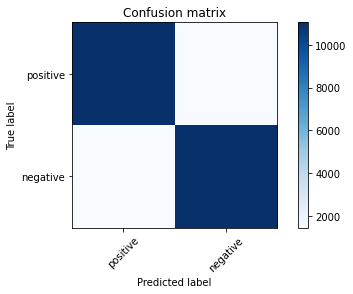

In [12]:
from sklearn.metrics import confusion_matrix
test_predicted=logreg.predict(test_vector)
cm=confusion_matrix(test_labels, test_predicted)
plot_confusion_matrix(cm, labels=["positive","negative"])
print(cm)